This program uses an artificial neural network called Long short term memory(LSTM) to predict closing stock price of a corporation using past 60 day stock price.


In [14]:
import math
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
yf.pdr_override()

In [28]:
# Get stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2024-01-01')

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433827,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [29]:
df.shape

(3018, 6)

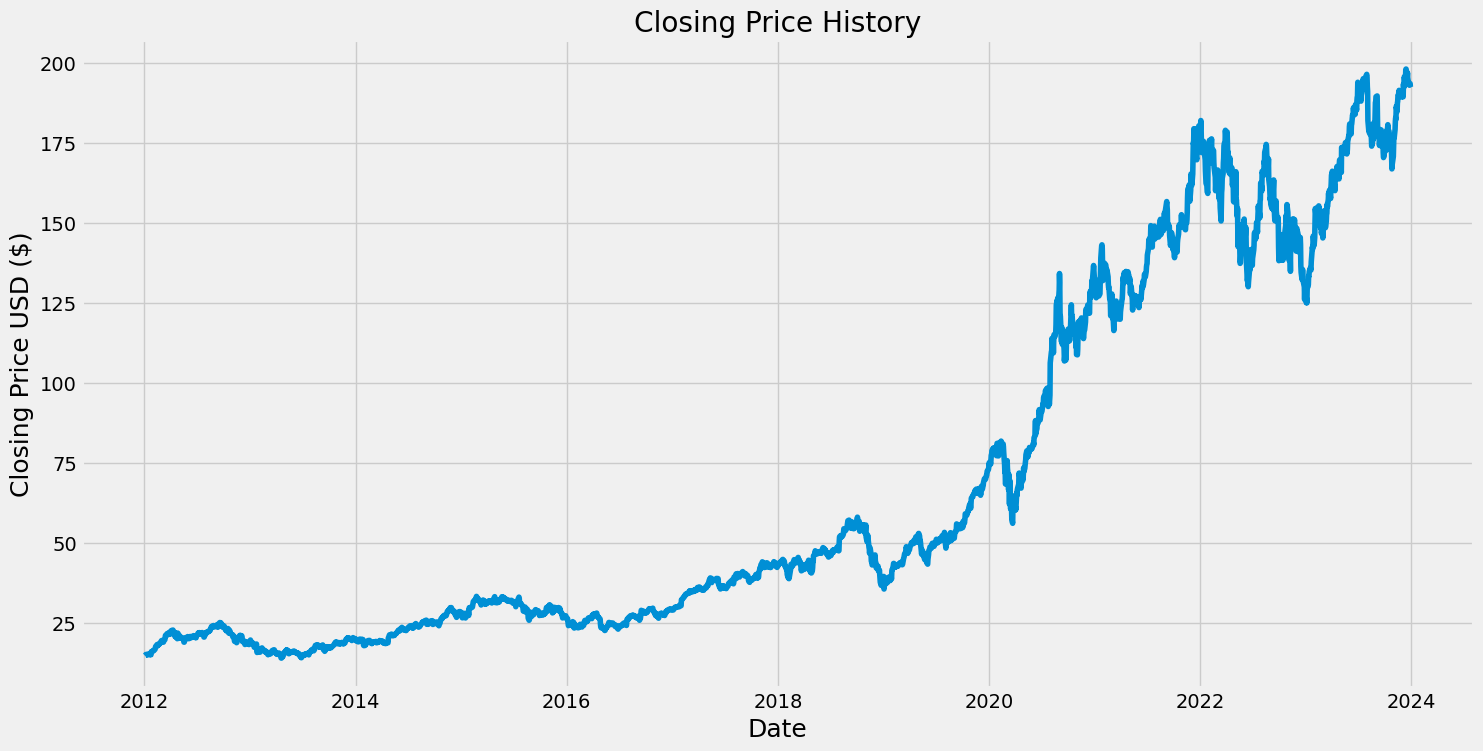

In [30]:
# Visualize the closing price History
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

In [32]:
# create a new DataFrame with only the 'Close' column
data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# get number of rows to train the model on
train_data_len = math.ceil(len(dataset) * 0.8)
train_data_len

2415

In [33]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.97306723],
       [0.97540217],
       [0.96970066]])

In [36]:
# create the training dataset
# create the scaled training dataset
train_data = scaled_data[0:train_data_len, :]

# split the data into xtrain(independent training features) and ytrain(dependent training features) datasets
x_train, y_train = [], []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()



[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]



In [37]:
# Convert x_train and y_train to numpy arrays for LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [38]:
x_train.shape

(2355, 60)

In [39]:
# Reshape x_train dataset because LSTM expects a 3D data (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [41]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [42]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2355/2355 [==============================] - 87s 35ms/step - loss: 5.6362e-04


In [44]:
# create the testing dataset
# create a new array containing scaled values from index 2415 to 3018
test_data = scaled_data[train_data_len - 60: , :]

#create x_test and y_test
x_test, y_test = [], dataset[train_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [45]:
# Convert the x_test into numpy array
x_test = np.array(x_test)

In [46]:
# reshape the x_test dataset
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [49]:
# Get the models predicted price values for x_test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # unscaling the values so it contains values like y_test


19/19 [==============================] - 1s 60ms/step


In [50]:
# evaluate the model by using root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

10.338764534497866

<ipython-input-54-13cf3142bdaf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


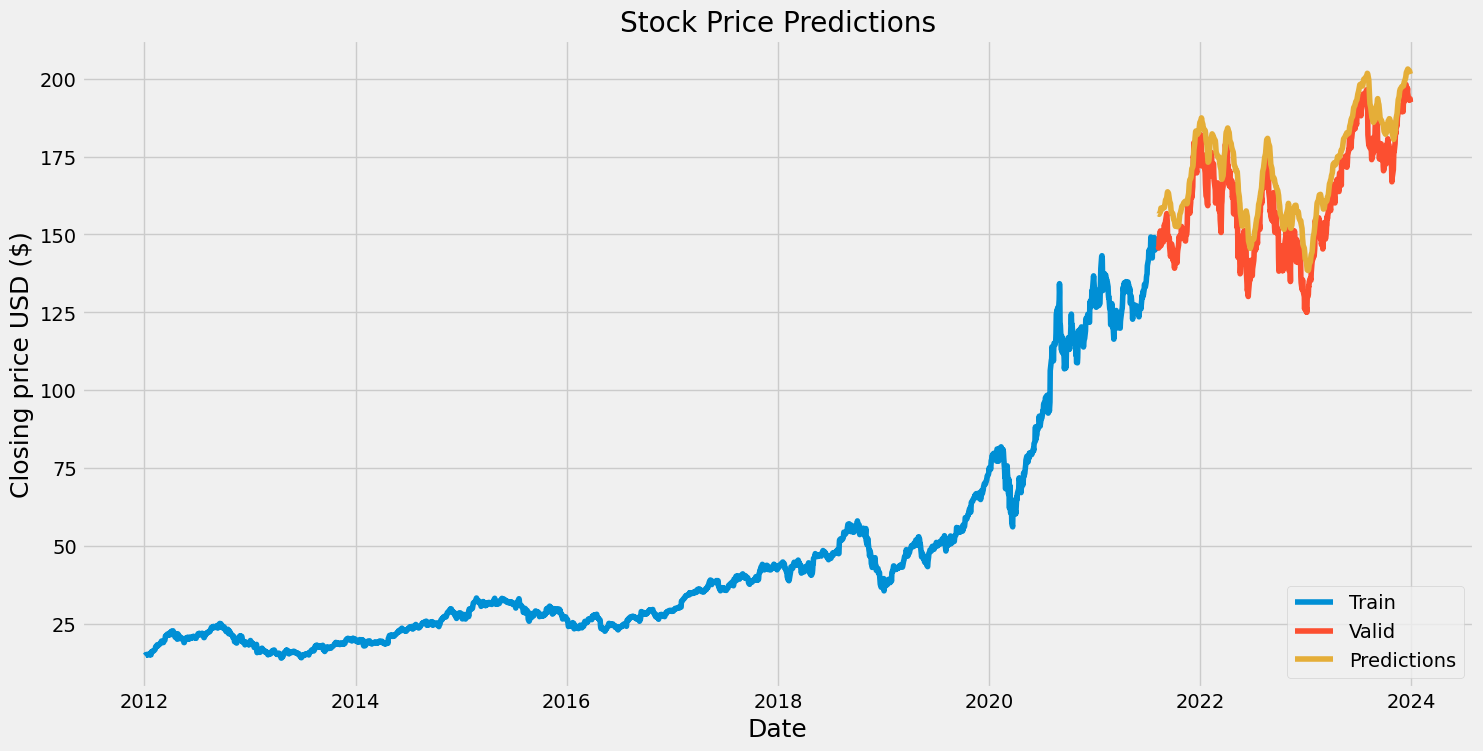

In [54]:
# plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

# visualise the model
plt.figure(figsize=(16,8))
plt.title('Stock Price Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()


In [55]:
# show the valid and predicted price
valid

,Close,Predictions
Date,,
2021-08-09,146.089996,156.714676
2021-08-10,145.600006,156.674606
2021-08-11,145.860001,156.554199
2021-08-12,148.889999,156.449844
2021-08-13,149.100006,156.741379
...,...,...
2023-12-22,193.600006,202.839035
2023-12-26,193.050003,202.500626
2023-12-27,193.149994,202.088593


In [58]:
# get the quote
corp_quote = pdr.get_data_yahoo("AAPL", start='2012-01-01', end='2024-01-02')

# create a new DataFrame
new_df = corp_quote.filter(['Close'])

#get the last 60 days closing price values and convert the dataframe into an array
last_60_days = new_df[-60:].values

#scale the data to be between 0 and 1
last_60_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_scaled)

#convert the X_test dataset to a numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# get predicted scale price
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 48ms/step


array([[201.16435]], dtype=float32)

In [61]:
corp_quote2 = pdr.get_data_yahoo("AAPL", start='2024-01-03', end='2024-01-04')
corp_quote2['Close']

[*********************100%%**********************]  1 of 1 completed


Date
2024-01-03    184.25
Name: Close, dtype: float64